In [3]:
import mxnet as mx
import matplotlib.pyplot as plt
from mxnet import nd,gluon,contrib,image
import sys
import numpy as np
import time
sys.path.insert(0,'..')
import gluonbook as gb

## 首先定义将坐标转换为矩形框的函数

In [8]:
#输入一个列表，将其转换为plt中的矩形
def bbox_to_rect(bbox,color='r'):
    return plt.Rectangle(xy=(bbox[0],bbox[1]),width=(bbox[2]-bbox[0]),height=(bbox[3]-bbox[1]),
                        fill = False,edgecolor=color,lw=2)

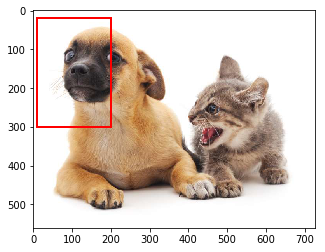

In [9]:
#输入一个图像和一个bbox，将其显示出来
img = image.imread('../img/catdog.jpg').asnumpy()
fig = plt.imshow(img)
fig.axes.add_patch(bbox_to_rect([10,20,200,300]))

## 定义一个能显示所有标记框的函数

In [16]:
def show_all_bboxes(axes,bboxes,labels=None,colors=None):
    def _make_list(obj,default_value=None):
        if obj is None:
            obj = default_value
        elif not isinstance(obj,(list,tuple)):
            obj = [obj]
        return obj
    
    labels = _make_list(labels)
    colors = _make_list(colors,['b','g','r','m','c'])
    
    #添加bbox
    for i,bbox in enumerate(bboxes):
        color = colors[i%len(colors)]   
        rect  = bbox_to_rect(bbox.asnumpy(),color)
        axes.add_patch(rect)
        #添加标签
        if labels and len(labels)>i:
            text_color = 'k' if color=='w' else 'w'
            axes.text(rect.xy[0],rect.xy[1],labels[i],
            va='center',ha='center',fontsize=10,color=text_color,
             bbox=dict(facecolor=color,lw=0))
    

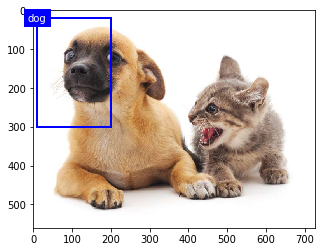

In [18]:
#输入一个图像和一个bbox，将其显示出来
img = image.imread('../img/catdog.jpg').asnumpy()
fig = plt.imshow(img)
show_all_bboxes(fig.axes,[nd.array([10,20,200,300])],labels=['dog'])

In [23]:
h,w = img.shape[0],img.shape[1]
img_scale = nd.array((w,h,w,h))

In [24]:
def show_diff_scale_anchors(axes,fmap_w,fmap_h,sizes,ratios,img_scale):
    #显示不同尺度的图像
    fmap = nd.zeros(shape=(1,3,fmap_h,fmap_w))
    #生成锚框 
    anchors = contrib.nd.MultiBoxPrior(fmap,sizes=sizes,ratios=ratios)
    #显示多尺度
    show_all_bboxes(axes,anchors[0]*img_scale)

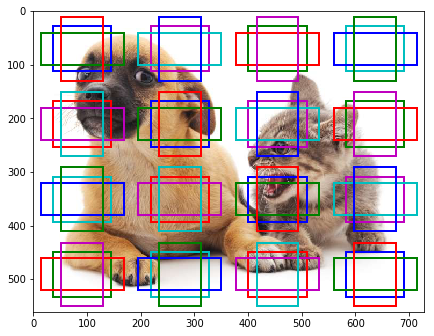

In [26]:
plt.figure(figsize=(7,7))
img = image.imread('../img/catdog.jpg').asnumpy()
fig = plt.imshow(img)
show_diff_scale_anchors(fig.axes,4,4,[0.15],[1,2,0.5],img_scale)

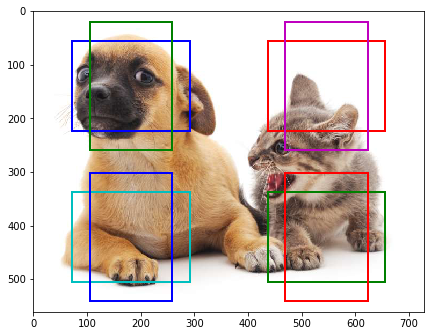

In [30]:
plt.figure(figsize=(7,7))
img = image.imread('../img/catdog.jpg').asnumpy()
fig = plt.imshow(img)
show_diff_scale_anchors(fig.axes,2,2,[0.3],[0.7,0.5],img_scale)

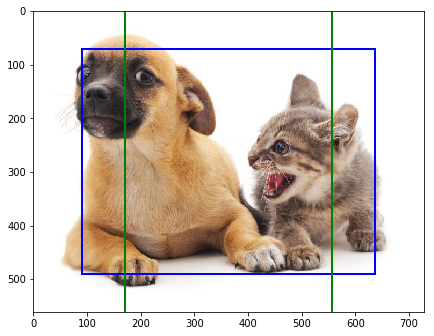

In [33]:
plt.figure(figsize=(7,7))
img = image.imread('../img/catdog.jpg').asnumpy()
fig = plt.imshow(img)
show_diff_scale_anchors(fig.axes,1,1,[0.75],[0.7,0.5],img_scale)